In [1]:
library(rstan)
library(brms)

rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())

Loading required package: StanHeaders
Loading required package: ggplot2
rstan (Version 2.19.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
Loading required package: Rcpp
Loading 'brms' package (version 2.9.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').

Attaching package: ‘brms’

The following object is masked from ‘package:rstan’:

    loo



In [2]:
fish_num_climate_3  <- read.csv("https://raw.githubusercontent.com/logics-of-blue/book-r-stan-bayesian-model-intro/master/book-data/4-2-1-fish-num-3.csv")
head(fish_num_climate_3)

fish_num,weather,temperature,human
<int>,<fct>,<dbl>,<fct>
1,cloudy,6.0,A
7,cloudy,20.6,B
12,cloudy,27.5,C
0,cloudy,8.5,D
0,cloudy,3.1,E
2,cloudy,21.0,F


In [3]:
summary(fish_num_climate_3)

    fish_num       weather    temperature        human   
 Min.   : 0.00   cloudy:50   Min.   : 0.40   A      :10  
 1st Qu.: 0.00   sunny :50   1st Qu.: 7.55   B      :10  
 Median : 1.50               Median :14.65   C      :10  
 Mean   : 2.48               Mean   :15.55   D      :10  
 3rd Qu.: 4.00               3rd Qu.:24.55   E      :10  
 Max.   :15.00               Max.   :29.70   F      :10  
                                             (Other):40  

In [4]:
glmm_pois_brms_human <- brm(
    formula = fish_num ~ weather + temperature + (1|human),
    family = poisson(),
    data = fish_num_climate_3,
    seed = 1,
    prior = c(set_prior("", class = "Intercept"), set_prior("", class = "sd"))
)
glmm_pois_brms_human

Compiling the C++ model
Start sampling


 Family: poisson 
  Links: mu = log 
Formula: fish_num ~ weather + temperature + (1 | human) 
   Data: fish_num_climate_3 (Number of observations: 100) 
Samples: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup samples = 4000

Group-Level Effects: 
~human (Number of levels: 10) 
              Estimate Est.Error l-95% CI u-95% CI Eff.Sample Rhat
sd(Intercept)     0.64      0.21     0.34     1.18        869 1.00

Population-Level Effects: 
             Estimate Est.Error l-95% CI u-95% CI Eff.Sample Rhat
Intercept       -0.85      0.31    -1.48    -0.26       1461 1.00
weathersunny    -0.51      0.13    -0.77    -0.25       2775 1.00
temperature      0.10      0.01     0.08     0.12       3638 1.00

Samples were drawn using sampling(NUTS). For each parameter, Eff.Sample 
is a crude measure of effective sample size, and Rhat is the potential 
scale reduction factor on split chains (at convergence, Rhat = 1).

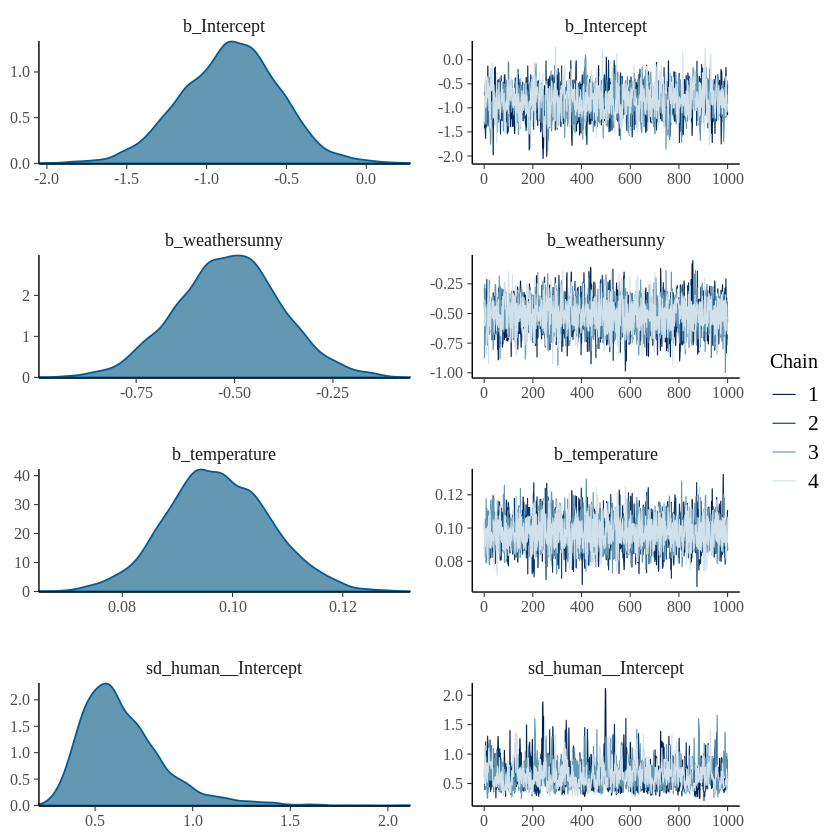

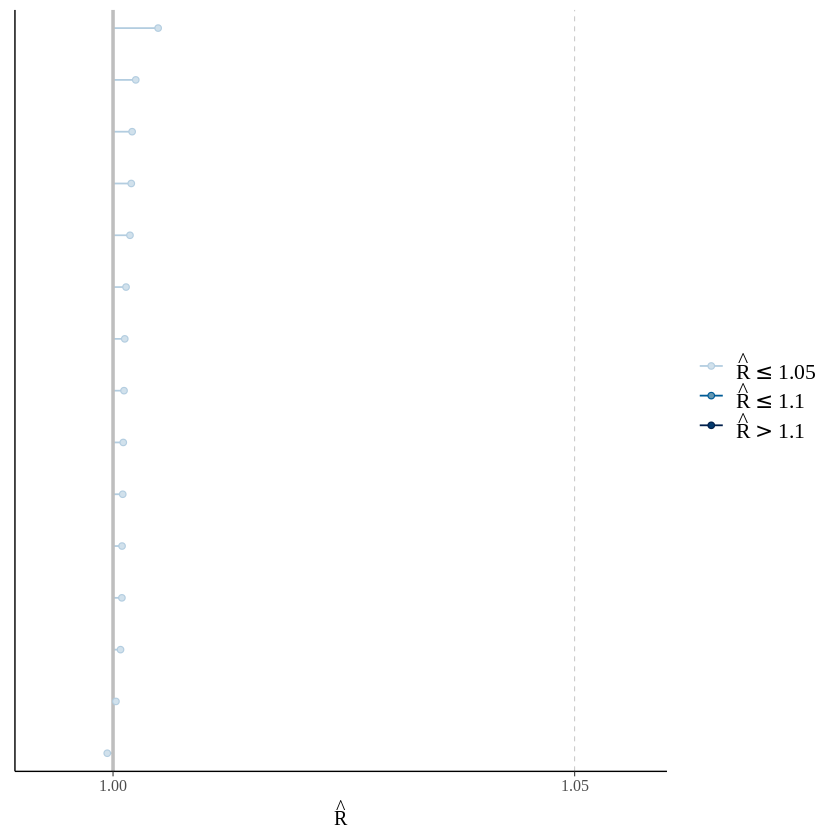

In [5]:
plot(glmm_pois_brms_human)
stanplot(glmm_pois_brms_human, type = "rhat")

In [6]:
glmm_pois_brms_human

 Family: poisson 
  Links: mu = log 
Formula: fish_num ~ weather + temperature + (1 | human) 
   Data: fish_num_climate_3 (Number of observations: 100) 
Samples: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup samples = 4000

Group-Level Effects: 
~human (Number of levels: 10) 
              Estimate Est.Error l-95% CI u-95% CI Eff.Sample Rhat
sd(Intercept)     0.64      0.21     0.34     1.18        869 1.00

Population-Level Effects: 
             Estimate Est.Error l-95% CI u-95% CI Eff.Sample Rhat
Intercept       -0.85      0.31    -1.48    -0.26       1461 1.00
weathersunny    -0.51      0.13    -0.77    -0.25       2775 1.00
temperature      0.10      0.01     0.08     0.12       3638 1.00

Samples were drawn using sampling(NUTS). For each parameter, Eff.Sample 
is a crude measure of effective sample size, and Rhat is the potential 
scale reduction factor on split chains (at convergence, Rhat = 1).

In [8]:
ranef(glmm_pois_brms_human)

$human
, , Intercept

      Estimate Est.Error       Q2.5       Q97.5
A  0.729993615 0.2580886  0.2427584  1.25576081
B  0.059857437 0.2995146 -0.5479999  0.67094230
C  0.664181892 0.2638772  0.1625499  1.17557974
D -0.644305480 0.3461561 -1.3855672 -0.01611634
E -0.141294712 0.3061092 -0.7714768  0.45129383
F -0.756666269 0.3600454 -1.5575444 -0.11122943
G  0.424681774 0.2786078 -0.1203675  0.98566090
H -0.339797519 0.2982175 -0.9574719  0.21675413
I -0.001576362 0.2850786 -0.5420764  0.55923549
J -0.191808607 0.2981473 -0.7969347  0.38077830

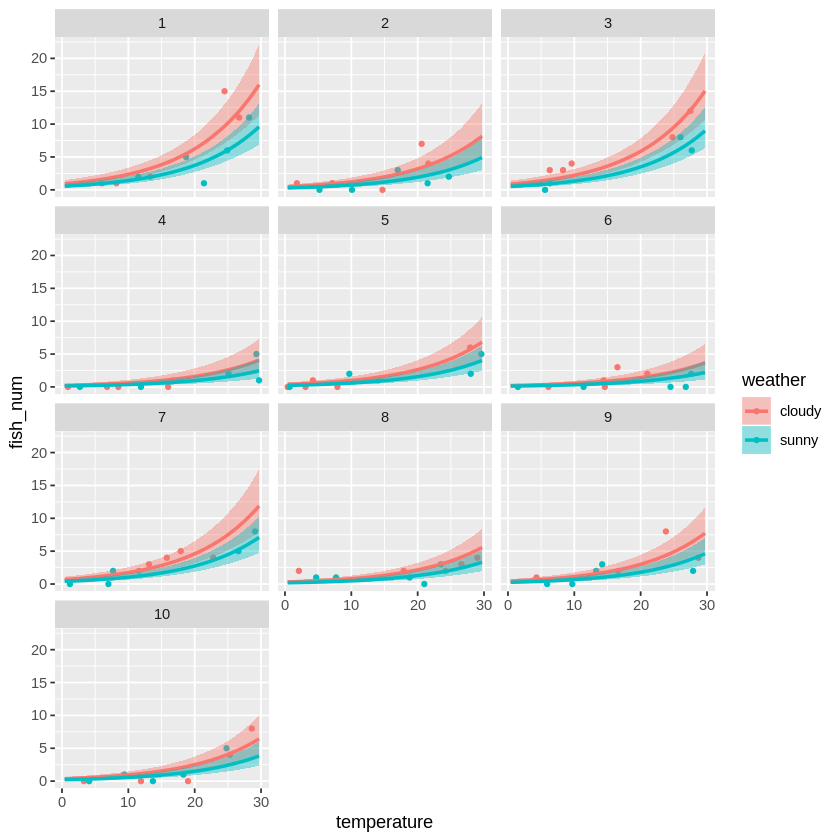

In [13]:
conditions <- data.frame(
  human = c("A","B","C","D","E","F","G","H","I","J"))

eff_glmm_human <- marginal_effects(
  glmm_pois_brms_human,
  effects = "temperature:weather",
  re_formula = NULL,
  conditions = conditions)

plot(eff_glmm_human, points = TRUE)